<a href="https://colab.research.google.com/github/alina518/practice/blob/main/Handwritten_Digit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNSIT Handwritten Digit Classification

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image #imageprocessing
#deeplearning
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [ ]:
#loading mnsit data from keras.dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [ ]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


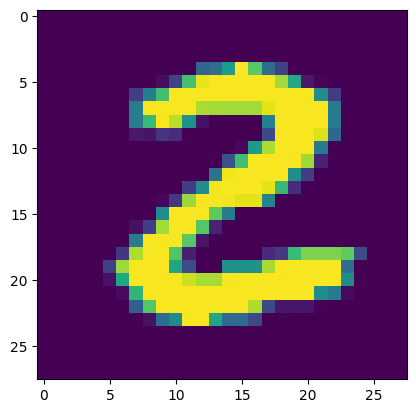

In [ ]:
plt.imshow(X_train[25])
plt.show()

Image Labels

In [ ]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [ ]:
#unique values
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


all images have same dimensions in this dataset, otherwise we have to resize all the images


In [ ]:
#scaling the values
X_train=X_train/255
X_test=X_test/255

Building a Neural Network

In [ ]:
#setting up the layers of the neural network
#Flatten is used to convert matrix into 1-D array
#Dense means it is connected to previous neural network
#relu activation few neurons=0 and few=1
#no 10 in output layer mean the number of classes
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#compiling the neural network

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#train the neural network
#epochs no of times the models should go through data
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8512 - loss: 0.5148
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9549 - loss: 0.1524
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9669 - loss: 0.1088
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9742 - loss: 0.0857
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9790 - loss: 0.0705
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9823 - loss: 0.0591
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9847 - loss: 0.0499
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9876 - loss: 0.0416
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9891 - loss: 0.0359
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9893 - loss: 0.0323


Accuracy of test data=98.9

In [ ]:
#accuracy on test data
loss,accuracy=model.evaluate(X_test,y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9630 - loss: 0.1410
0.9661999940872192


test data accuracy-97

In [ ]:
print(X_test.shape)

(10000, 28, 28)


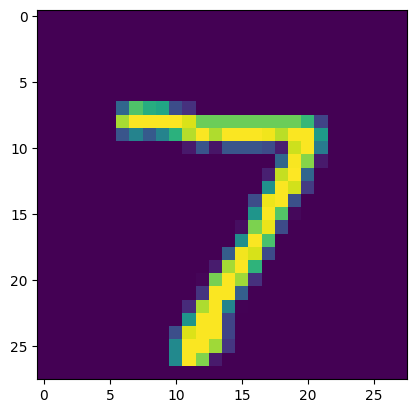

In [ ]:
#first image
plt.imshow(X_test[0])
plt.show()

In [ ]:
print(y_test[0])

7


In [ ]:
y_pred=model.predict(X_test)
print(y_pred.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000, 10)


In [ ]:
print(y_pred[0])

[1.8387478e-02 1.6093580e-05 5.4843638e-02 1.8064985e-01 4.2434496e-09
 3.8126970e-03 2.9760141e-09 9.9999642e-01 1.3492136e-03 9.1349167e-01]


model.predict() gives the prediction probability for each class for that data point

In [ ]:
#converting the prediction probabilities to class labels
label_for_first_test_image=np.argmax(y_pred[0])
print(label_for_first_test_image)

7


In [ ]:
y_pred_labels=[np.argmax(i) for i in y_pred]
print(y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(8), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

y_test--> true labels
y_pred_labels--> predicted labels

Confusion Matrix

In [ ]:
confusion_mat=confusion_matrix(y_test,y_pred_labels)


In [ ]:
print(confusion_mat)

tf.Tensor(
[[ 965    0    1    2    2    1    3    1    3    2]
 [   0 1110    1    9    1    1    4    1    7    1]
 [   5    1  967   29    4    1    3    8   14    0]
 [   0    0    1  993    0    4    2    4    5    1]
 [   1    0    0    1  970    0    3    3    1    3]
 [   2    0    0   24    3  852    3    0    2    6]
 [   2    2    2    2   11   14  921    1    2    1]
 [   4    4    7   10    3    1    0  975    1   23]
 [   0    0    2   14    5    4    3    2  940    4]
 [   1    3    0    6   21    2    0    2    5  969]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

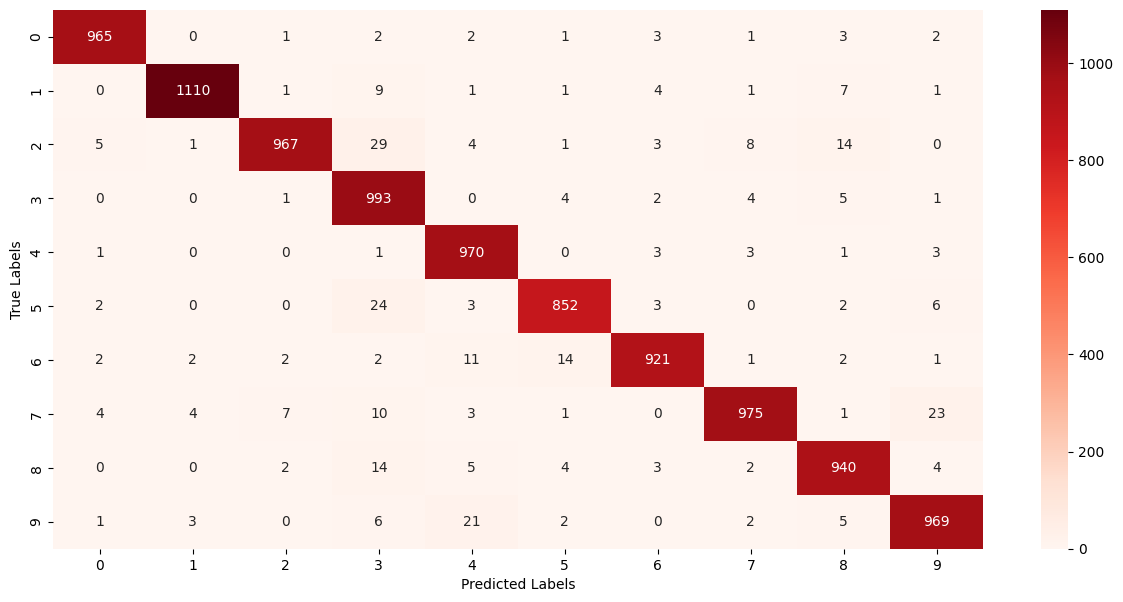

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(confusion_mat,annot=True,fmt='d',cmap='Reds')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a Predictive System

In [ ]:
input_img_path='/content/7.png'
input_img=cv2.imread(input_img_path)

In [ ]:
type(input_img)

numpy.ndarray

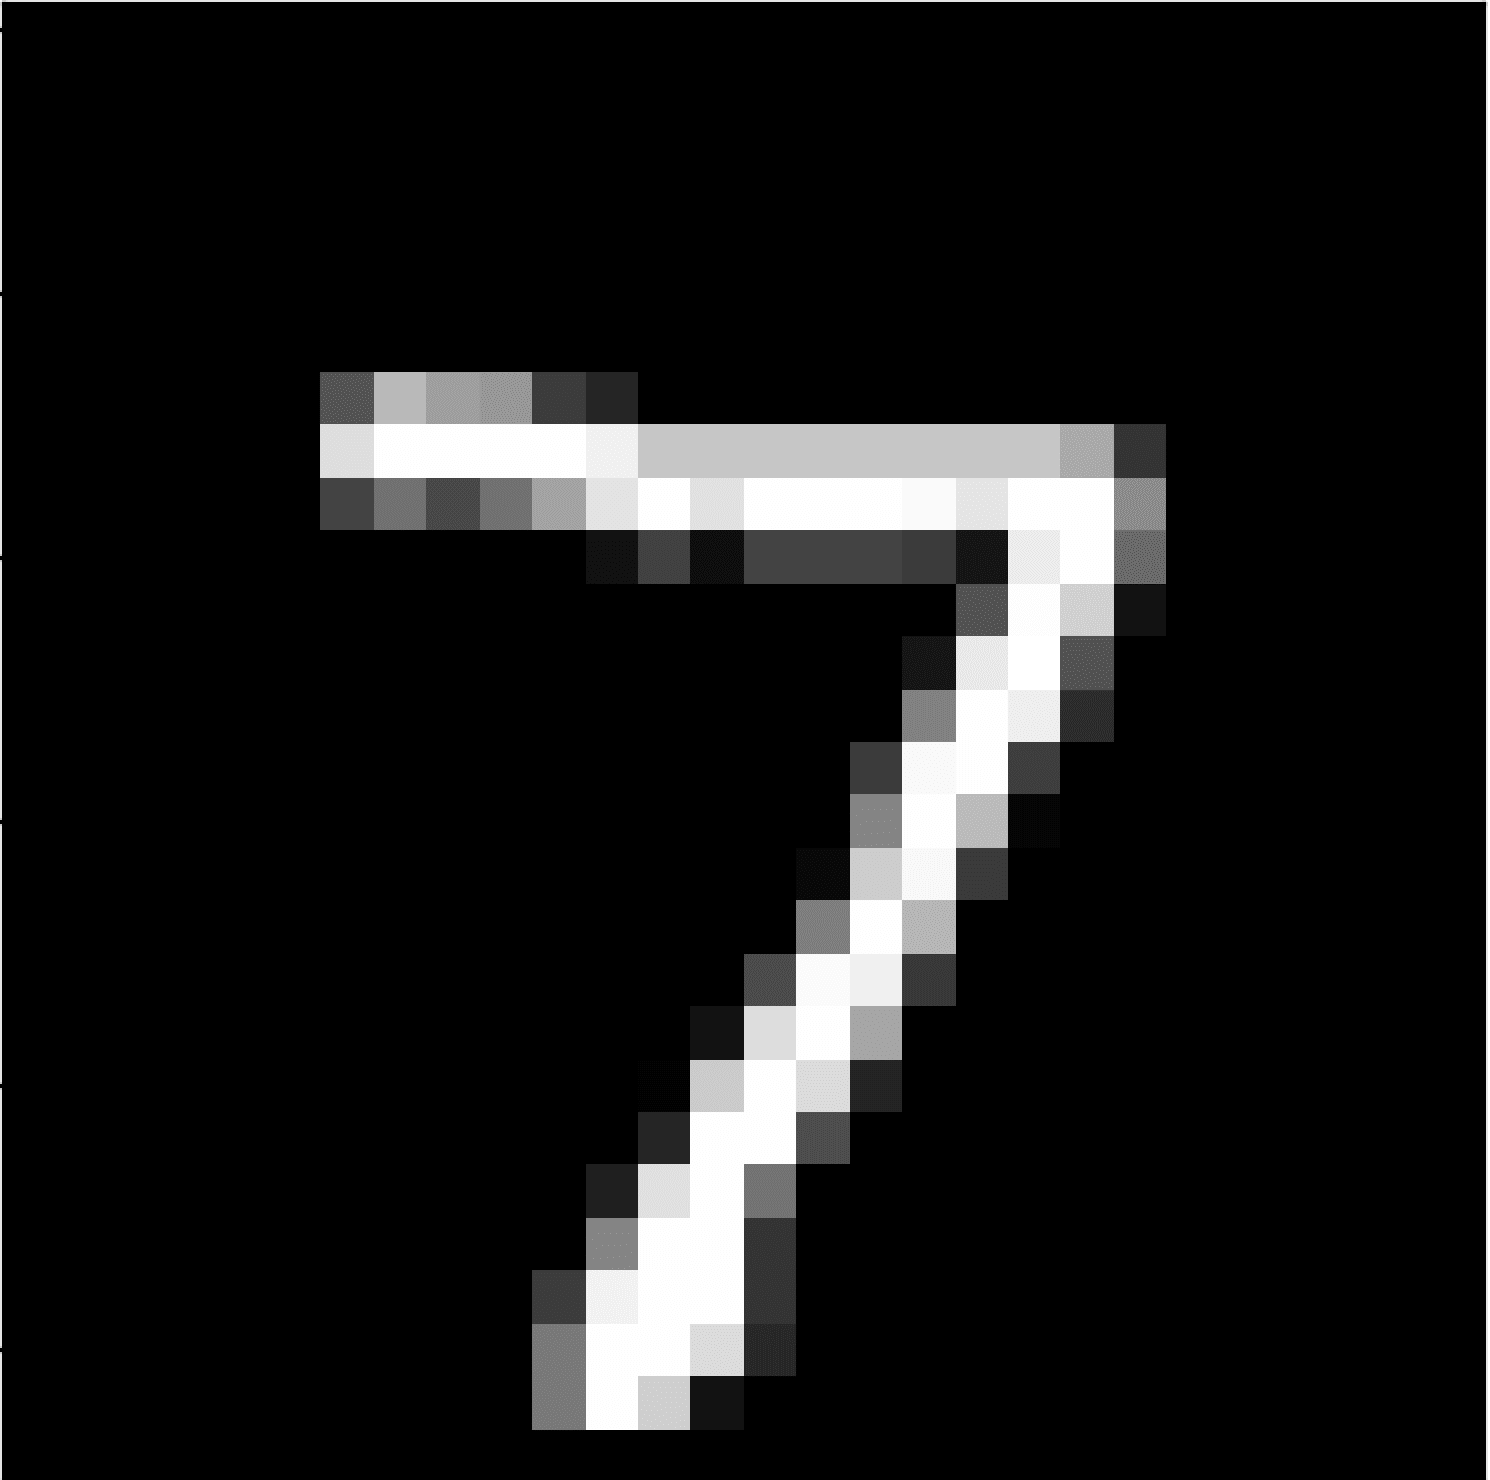

In [ ]:
cv2_imshow(input_img)

In [ ]:
input_img.shape

(1480, 1490, 3)

In [ ]:
grayscale=cv2.cvtColor(input_img,cv2.COLOR_RGB2GRAY)
# image from rgb to grayscale

In [ ]:
grayscale.shape

(1480, 1490)

In [ ]:
#resize image
input_img_resize=cv2.resize(grayscale,(28,28))

In [ ]:
input_img_resize.shape

(28, 28)

In [ ]:
input_img_resize=input_img_resize/255

In [ ]:
input_img_reshaped=np.reshape(input_img_resize,[1,28,28])

In [ ]:
input_prediction=model.predict(input_img_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[1.8205225e-02 1.5994494e-05 5.5214170e-02 1.8617409e-01 4.2902610e-09
  3.8011179e-03 2.9357823e-09 9.9999636e-01 1.3667581e-03 9.1494334e-01]]


In [ ]:
input_pred_label=np.argmax(input_prediction)
print(input_pred_label)

7


Building a predictive system

Path of the image to be predicted:/content/7.png


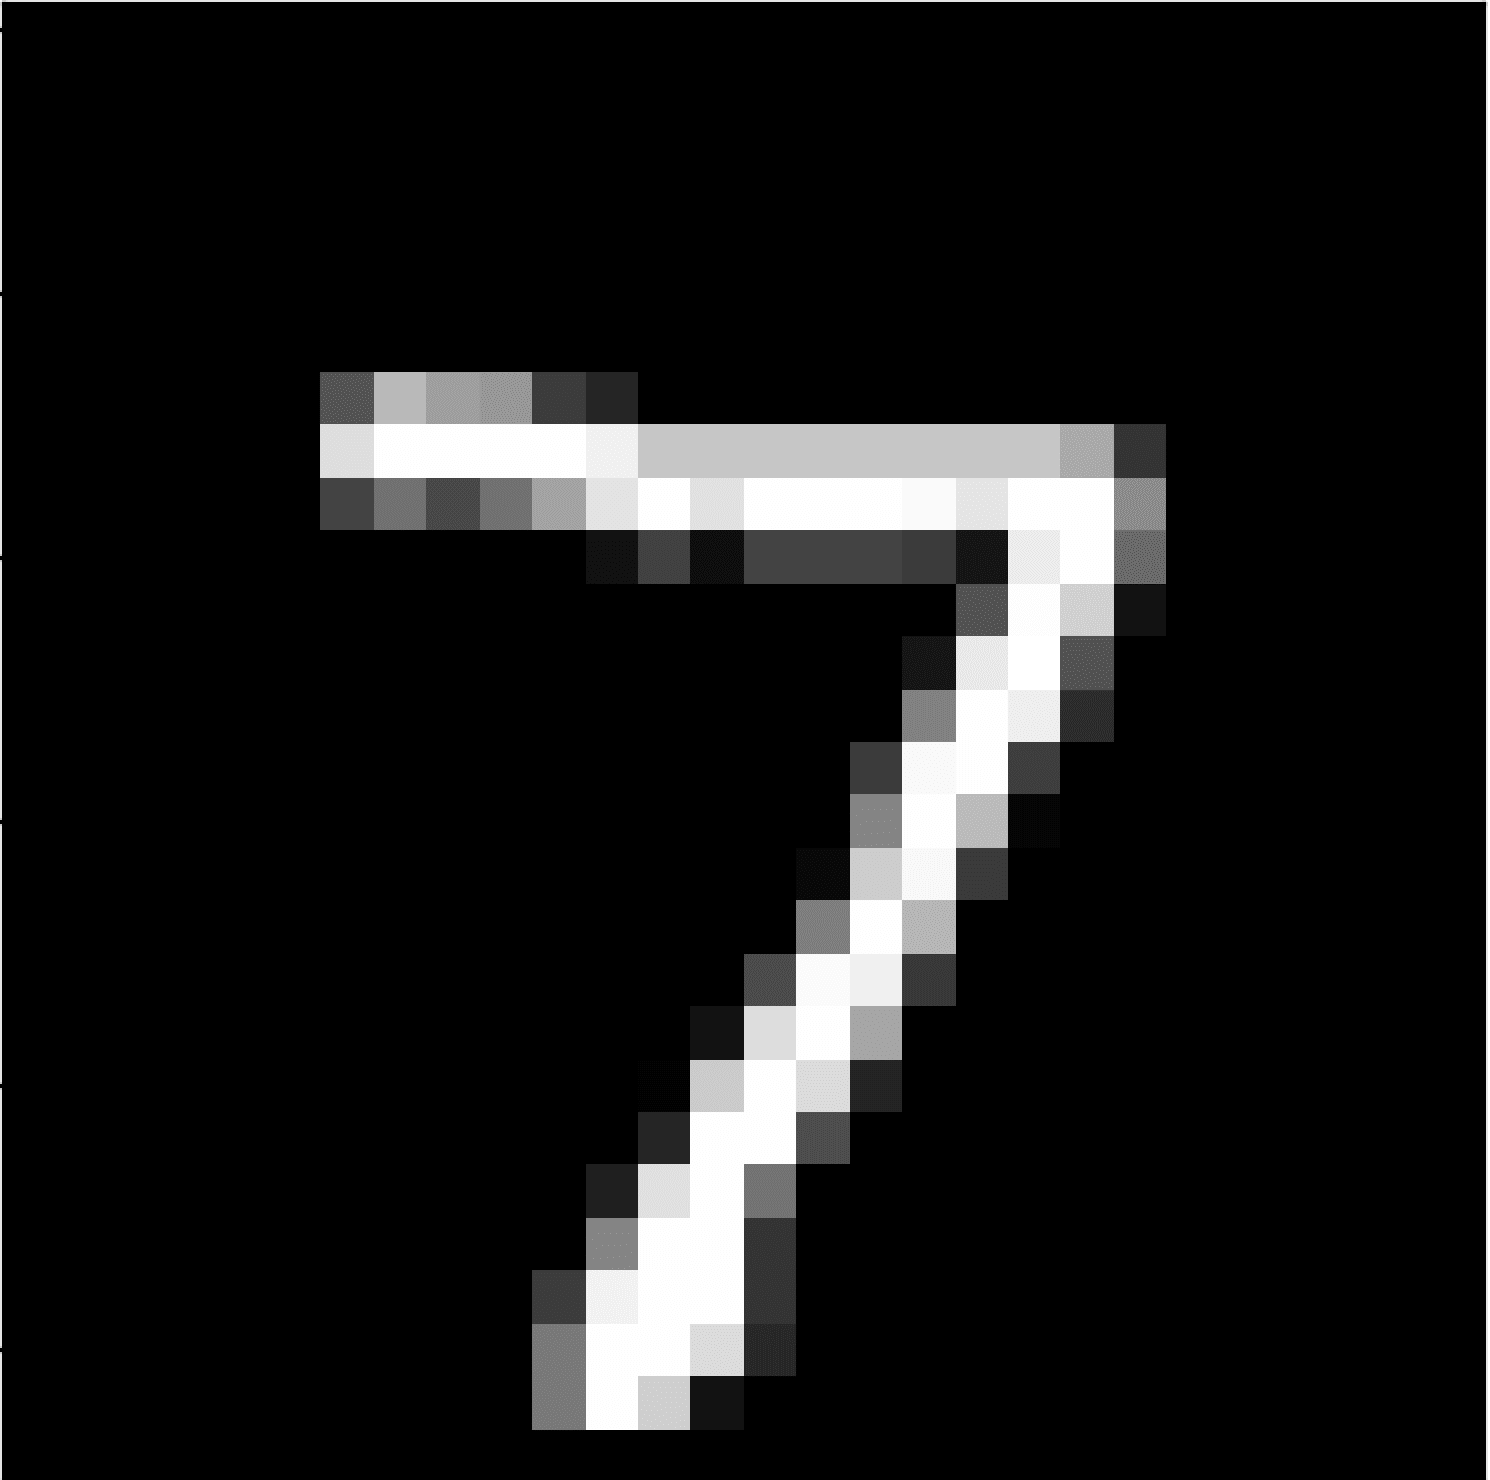

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
The handwritten digit is predicted as:  7


In [ ]:
input_image_path=input('Path of the image to be predicted:')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
input_img_resize=cv2.resize(grayscale,(28,28))
input_img_resize=input_img_resize/255
input_img_reshaped=np.reshape(input_img_resize,[1,28,28])
input_prediction=model.predict(input_img_reshaped)
input_pred_label=np.argmax(input_prediction)
print('The handwritten digit is predicted as: ',input_pred_label)